In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime
from datetime import timedelta

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

import tqdm
import tensorflow_addons as tfa
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

df = pd.read_csv('Datasets/covid_19_india.csv')
df1 = df

df.head()

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
tqdm.__version__

'4.45.0'

In [3]:
df['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#Making a List of Dates such that they are understandable

df['Date'] = D



df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [4]:
df['Day'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
#Subtracting The Dates and converting them to Day1,Day2,Day3....

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0
...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0


In [5]:
df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Cured']

df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0,657
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0,0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0,18
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0,1612


In [6]:
Confirmed = df.groupby('Date',as_index=False)['Confirmed'].sum()
Cured = df.groupby('Date',as_index=False)['Cured'].sum()
Deaths = df.groupby('Date',as_index=False)['Deaths'].sum()
Active = df1.groupby('Date',as_index=False)['Active'].sum()

Confirmed

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
85,2020-04-24,23452
86,2020-04-25,24893
87,2020-04-26,26605
88,2020-04-27,28160


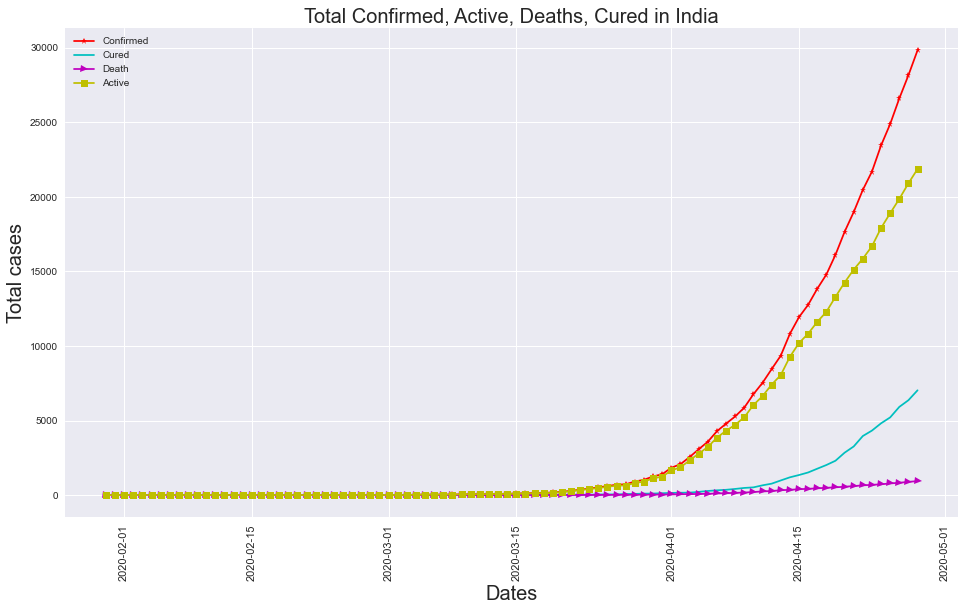

In [19]:
plt.figure(figsize= (16,9))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Deaths, Cured in India" , fontsize = 20)

ax1 = plt.plot_date(y= Confirmed['Confirmed'],x= Confirmed['Date'],label = 'Confirmed',marker='*',linestyle ='-', color = 'r')
ax2 = plt.plot_date(y= Cured['Cured'],x= Cured['Date'],label = 'Cured',marker='_',linestyle ='-',color = 'c')
ax3 = plt.plot_date(y= Deaths['Deaths'],x= Deaths['Date'],label = 'Death', marker='>',linestyle ='-',color = 'm')
ax4 = plt.plot_date(y= Active['Active'],x= Active['Date'],label = 'Active', marker='s',linestyle ='-',color = 'y')
plt.legend();

# State-wise Analysis:

In [8]:
StateCases = df1[['State/UnionTerritory','Confirmed','Deaths','Cured','Active']]
StateCases = StateCases.groupby('State/UnionTerritory').max().reset_index()

StateCases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Purples',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\

,State/UnionTerritory,Confirmed,Deaths,Cured,Active
19,Maharashtra,8590,369,1282,6939
9,Gujarat,3548,162,394,2992
7,Delhi,3108,54,877,2177
18,Madhya Pradesh,2368,113,361,1894
28,Rajasthan,2262,46,669,1777
33,Uttar Pradesh,2043,31,400,1612
29,Tamil Nadu,1937,24,1101,1111
1,Andhra Pradesh,1259,31,258,970
30,Telengana,1004,26,321,739
35,West Bengal,697,20,109,568


# Active cases trend of each state:

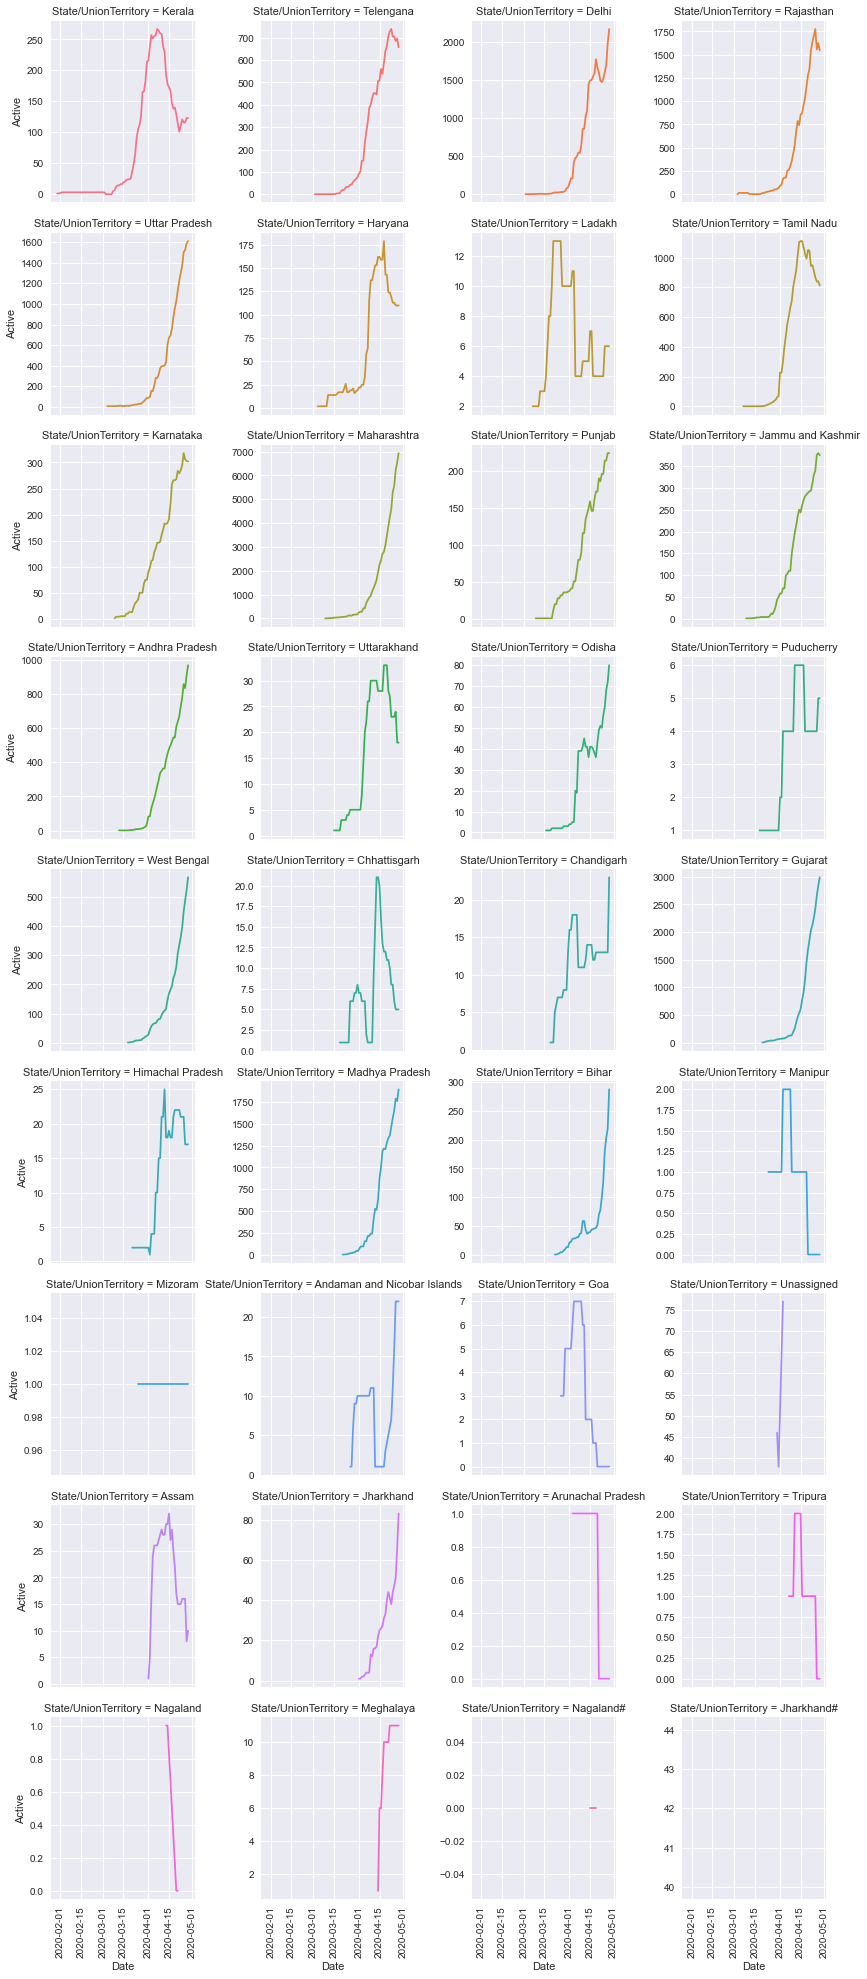

In [9]:
plt.style.use('seaborn')
g = sns.FacetGrid(df1, col="State/UnionTerritory", hue="State/UnionTerritory", 
                  sharey=False, col_wrap=4)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
plt.show()

In [10]:
df = df.sort_values(by=['Day'])
df.drop(df.iloc[:, 0:8], inplace = True, axis = 1)
#df.drop(['time_delta'], inplace = True, axis = 1)
df = df.groupby(['Day'],as_index=False).sum()

#Summing up the confirmed cases for each day

df

,Day,Confirmed,Active
0,0.0,1,1
1,1.0,1,1
2,2.0,2,2
3,3.0,3,3
4,4.0,3,3
...,...,...,...
85,85.0,23452,17915
86,86.0,24893,18904
87,87.0,26605,19865
88,88.0,28160,20912


In [11]:
#Processing the data to be fed into the model

X = df['Day']
y = df['Confirmed']


X=np.array(X,dtype='float')
y = np.array(y,dtype='int')


X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

#Test & Train split

In [13]:
model = Sequential()
model.add(Dense(500, input_dim=1, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [14]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
print('>>> Training Started...1.5 mins to go..')
model.fit(X_train,y_train,epochs=5000, verbose=0)
#callbacks=[TQDMNotebookCallback()] for TQDM Progress

>>> Training Started...1.5 mins to go..


# Prediction of COVID19 cases using available data:
Available Data: Confirmed cases from 30/1/20 to 28/4/20
<br>
The data is split into 30/1/20 to 1/4/20 as known Data and Predict the cases from 2/4/20 to 28/4/20. 

In [15]:
#Predicting the model using test data

predict=model.predict(X_test)

print(X_test.flatten())
print('*****************************************************')    
print(predict.flatten())
print('*****************************************************')
print(y_test.flatten())

[63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82. 83. 84. 85. 86. 87. 88. 89.]
*****************************************************
[ 1907.9536  2367.1536  3016.0713  3799.4207  4673.371   5645.94
  6676.4844  7746.251   8824.099   9906.851  10991.049  12075.242
 13159.429  14243.612  15327.799  16411.98   17496.248  18580.56
 19664.873  20749.193  21833.545  22917.992  24002.445  25086.904
 26171.37   27255.836  28340.355 ]
*****************************************************
[ 2069  2547  3072  3577  4281  4789  5274  5865  6761  7529  8447  9352
 10815 11933 12759 13835 14792 16116 17656 18985 20471 21700 23452 24893
 26605 28160 29834]


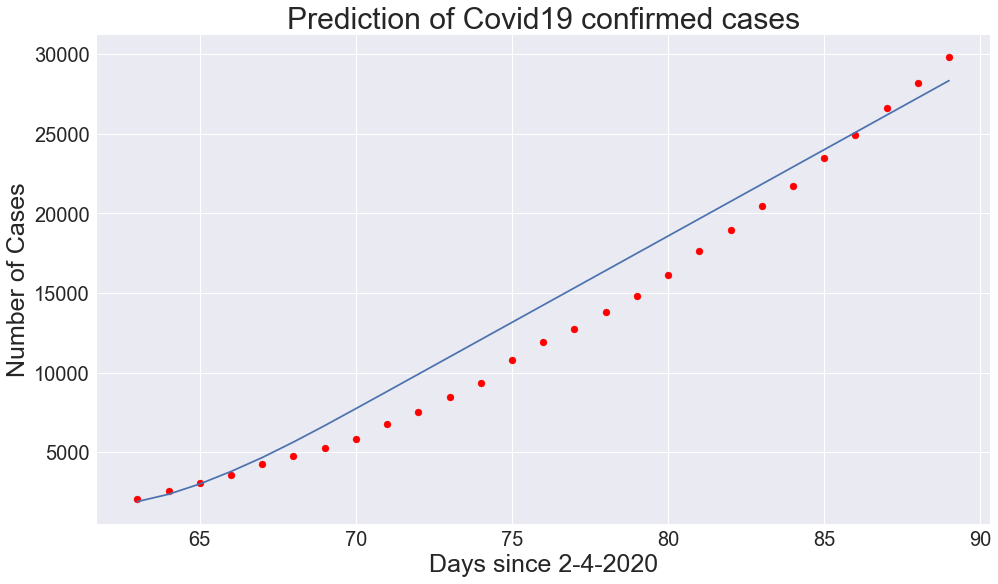

In [16]:
plt.figure(figsize=(16,9))
plt.title('Prediction of Covid19 confirmed cases', size=30)
plt.xlabel('Days since 2-4-2020', size=25)
plt.ylabel('Number of Cases',size=25)
plt.scatter(X_test, y_test, color = 'red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot()
plt.plot(X_test, predict)

# Future Prediction:
Predicting the cases for the next 10 days

In [17]:
Future = [[90.],[91.],[92.],[93.],[94.],[95.],[96.],[97.],[98.],[99.]]
Future=np.array(Future,dtype='float')

predict=model.predict(Future)

df2 = pd.DataFrame()

df2['Day'] = Future.flatten()

df2['Prediction'] = predict.flatten()

df2

,Day,Prediction
0,90.0,29424.935547
1,91.0,30509.517578
2,92.0,31594.099609
3,93.0,32678.689453
4,94.0,33763.316406
5,95.0,34847.933594
6,96.0,35932.558594
7,97.0,37017.199219
8,98.0,38101.843750
9,99.0,39186.488281
